# EDA for Actualmed-COVID-chestxray-dataset

여기서 진행한 EDA (Exploratory Data Analysis)는 COVIDx-CXR dataset을 생성하는 [create_COVIDx.ipynb](https://github.com/lindawangg/COVID-Net/blob/master/create_COVIDx.ipynb)의 내용을 기반으로 작성되었다. COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image만 사용했다.

In [1]:
import pandas as pd

## Load metadata.csv

metadata.csv 파일의 인코딩이 unknown 8-bit라서 이를 utf-8로 변경해줘야 한다 (참고: [Link](https://stackoverflow.com/a/58833909)).

In [2]:
meta_data_path = 'Actualmed-COVID-chestxray-dataset/metadata.csv'
meta_data = pd.read_csv(meta_data_path)
meta_data.head(3)

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,imagename,artifacts/distortion,notes
0,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313090023421...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
1,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313100318375...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
2,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317090830828...,NaN,Negative (covid-19 viral infection is excluded...


## Attirubtes

| Attribute | Description |
|:------|:-----|
| patientid | Internal identifier |
| offset | Number of days since the start of symptoms or hospitalization for each image. If a report indicates "after a few days", then 5 days is assumed. This is very important to have when there are multiple images for the same patient to track progression. |
| sex | Male (M), Female (F), or blank |
| age | Age of the patient in years |
| finding | Type of pneumonia |
| survival | Yes (Y) or no (N) or blank if unknown|
| temperature | Temperature of the patient in Celsius at the time of the image|
| pO2 saturation | partial pressure of oxygen saturation in % at the time of the image |
| view | Posteroanterior (PA), Anteroposterior (AP), AP Supine (APS), or Lateral (L) for X-rays; Axial or Coronal for CT scans. Translations: Bettaufnahme->Supine, Liegend->Supine|
| modality | CT, X-ray, or something else |
| imagename | image name with the extension |
| artifacts/distortion | a change to the intended or true meaning of something:|
| notes | Clinical notes about the image and/or the patient or other notes|

In [53]:
meta_data.dtypes

patientid                object
offset                  float64
sex                     float64
age                     float64
finding                  object
survival                float64
temperature             float64
pO2 saturation          float64
view                     object
modality                 object
imagename                object
artifacts/distortion    float64
notes                    object
dtype: object

## Data distribution

### # images

In [54]:
print(f'All: {len(meta_data)}, COVID-19: {meta_data["finding"].value_counts()["COVID-19"]}')

All: 238, COVID-19: 58


### # images by patient ID

대부분의 Patient가 1장의 CXR image를 가진다.

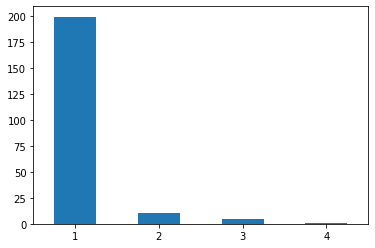

In [26]:
from collections import Counter
pd.Series(Counter(meta_data['patientid'].value_counts(ascending=True).tolist())).plot.bar(rot=0)

4장의 CXR image를 가지는 Patient는 4명, 3장은 5명, 2장은 10명이다.

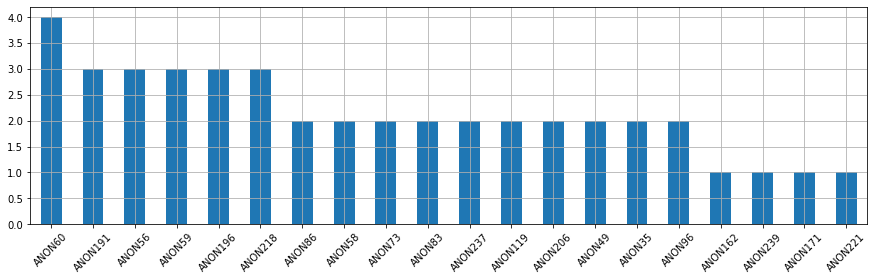

In [7]:
meta_data['patientid'].value_counts()[:20].plot.bar(figsize=(15, 4), rot=45, grid=True)

### Patient types

Patient의 질환에 대해 살펴보았다.

#### All types

Figure1-COVID-chestxray-dataset는 Image는 3개의 Class를 가진다.

In [27]:
meta_data['finding'].unique()

array([nan, 'No finding', 'COVID-19'], dtype=object)

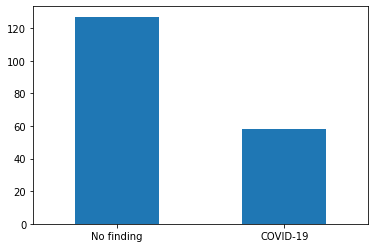

In [28]:
meta_data['finding'].value_counts().plot.bar(rot=0)

### Other columns

In [29]:
meta_data.columns.tolist()

['patientid',
 'offset',
 'sex',
 'age',
 'finding',
 'survival',
 'temperature',
 'pO2 saturation',
 'view',
 'modality',
 'imagename',
 'artifacts/distortion',
 'notes']

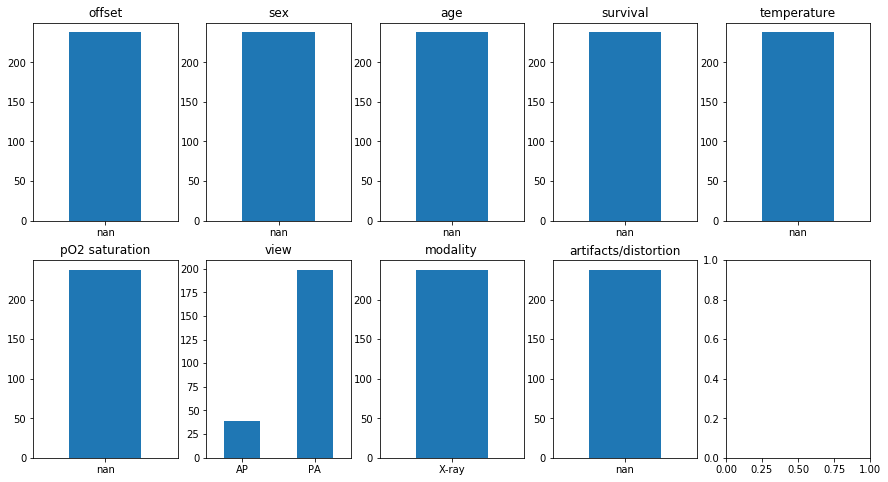

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
meta_data['offset'].value_counts(dropna=False, ascending=True).plot.bar(title='offset', rot=0, ax=axes[0,0])
meta_data['sex'].value_counts(dropna=False, ascending=True).plot.bar(title='sex', rot=0, ax=axes[0,1])
meta_data['age'].value_counts(dropna=False, ascending=True).plot.bar(title='age', rot=0, ax=axes[0,2])
meta_data['survival'].value_counts(dropna=False, ascending=True).plot.bar(title='survival', rot=0, ax=axes[0,3])
meta_data['temperature'].value_counts(dropna=False, ascending=True).plot.bar(title='temperature', rot=0, ax=axes[0,4])
meta_data['pO2 saturation'].value_counts(dropna=False, ascending=True).plot.bar(title='pO2 saturation', rot=0, ax=axes[1,0])
meta_data['view'].value_counts(dropna=False, ascending=True).plot.bar(title='view', rot=0, ax=axes[1,1])
meta_data['modality'].value_counts(dropna=False, ascending=True).plot.bar(title='modality', rot=0, ax=axes[1,2])
meta_data['artifacts/distortion'].value_counts(dropna=False, ascending=True).plot.bar(title='artifacts/distortion', rot=0, ax=axes[1,3])

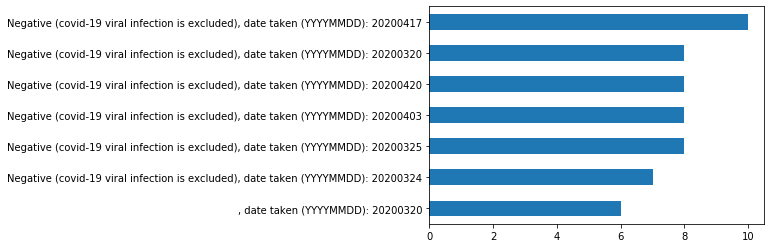

In [32]:
meta_data['notes'].value_counts(dropna=False, ascending=True)[-7:].plot.barh()

## Test dataset

COVIDx-CXR dataset에서 covid-chestxray-dataset에 대해 선택한 Test dataset의 Patient ID들을 살펴보았다.

In [49]:
test_patients = ['ANON24', 'ANON45', 'ANON126', 'ANON106', 'ANON67',
                 'ANON153', 'ANON135', 'ANON44', 'ANON29', 'ANON201', 
                 'ANON191', 'ANON234', 'ANON110', 'ANON112', 'ANON73', 
                 'ANON220', 'ANON189', 'ANON30', 'ANON53', 'ANON46',
                 'ANON218', 'ANON240', 'ANON100', 'ANON237', 'ANON158',
                 'ANON174', 'ANON19', 'ANON195',]

In [50]:
len(test_patients)

28

In [58]:
meta_data['imagename'][0]

'CR.1.2.840.113564.1722810170.20200313090023421700.1003000225002.png'

In [52]:
meta_data[meta_data['patientid'].isin(test_patients)].head(3)

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,imagename,artifacts/distortion,notes
7,ANON45,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,AP,X-ray,CR.1.2.840.113564.1722810170.20200320071047906...,NaN,", date taken (YYYYMMDD): 20200320"
8,ANON234,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,AP,X-ray,CR.1.2.840.113564.1722810170.20200320072856343...,NaN,", date taken (YYYYMMDD): 20200320"
9,ANON24,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,AP,X-ray,CR.1.2.840.113564.1722810170.20200320103403375...,NaN,", date taken (YYYYMMDD): 20200320"


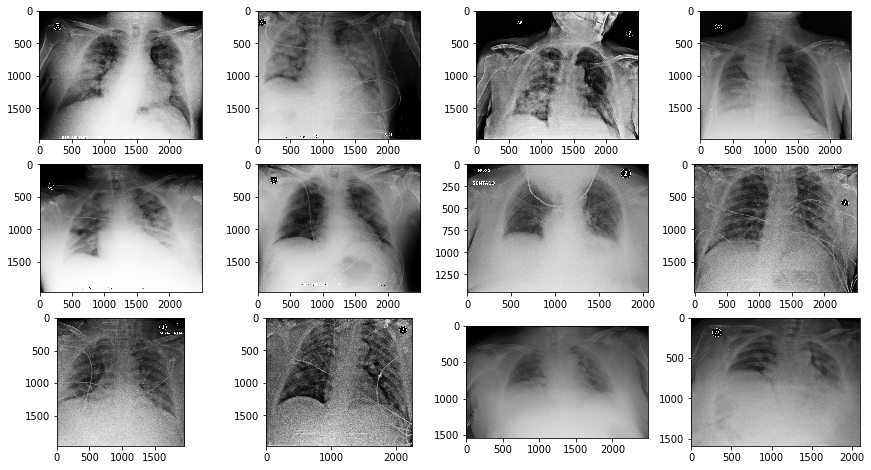

In [61]:
import matplotlib.pyplot as plt
import cv2

test_img_names = meta_data[meta_data['patientid'].isin(test_patients)]['imagename'].tolist()
fig = plt.figure(figsize=(15, 8))
for i, img_name in enumerate(test_img_names[:12]):
    img = cv2.imread(f'Actualmed-COVID-chestxray-dataset/images/{img_name}')
    fig.add_subplot(3, 4, i+1)
    plt.imshow(img)
    
plt.show()

## Conclusion

* COVIDx-CXR dataset에서는 이 Dataset의 COVID-19 image들만 사용했다.
* 전체 58장의 COVID-19 image 중 28장만 Test dataset으로 사용했다.